Having Porzingis on your team means you’re donna learn so much about human anatomy. I’m not donna front like I know where the medial retinaculum is located
Counter({'gon': 2, 'na': 2, 'Having': 1, 'Porzingis': 1, 'team': 1, 'means': 1, 'youre': 1, 'learn': 1, 'much': 1, 'human': 1, 'anatomy': 1, 'Im': 1, 'front': 1, 'like': 1, 'I': 1, 'know': 1, 'medial': 1, 'retinaculum': 1, 'located': 1})
Counter({'gon': 2, 'na': 2, 'I': 2, 'Having': 1, 'Porzingis': 1, 'team': 1, 'means': 1, 'learn': 1, 'much': 1, 'human': 1, 'anatomy': 1, 'front': 1, 'like': 1, 'know': 1, 'medial': 1, 'retinaculum': 1, 'located': 1})


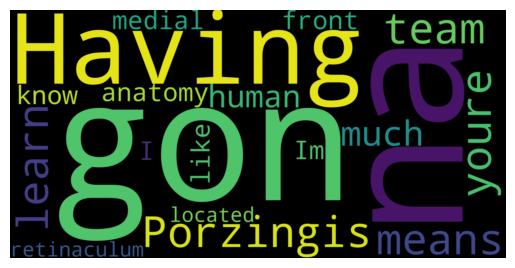

In [50]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob


import time
import config
from datetime import datetime  
import csv
from confluent_kafka import Producer, Consumer, KafkaError
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import json
import threading
%matplotlib inline
# import matplotlib.pyplot as plt

def correct_spelling(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()
    return str(corrected_text)

def clean_text(text):
    # text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    # text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    # text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    # text = text.lower()  # Convert to lowercase
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

test = "Having Porzingis on your team means you’re gonna learn so much about human anatomy. I’m not gonna front like I know where the medial retinaculum is located"

no_specialchar = clean_text(test)
word_dict = remove_stopwords(no_specialchar).split()
# word_dict1 = clean_text(remove_stopwords(test)).split()

print(Counter(word_dict))
print(Counter(word_dict1))

plt.ion()
# plt.switch_backend('Agg') 

wc = WordCloud(width=2000, height=1000, max_words=200).generate_from_frequencies(Counter(word_dict))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.draw()
plt.show()
# plt.pause(5)  # Update every 30 seconds
    

In [16]:
import time
import config
from datetime import datetime  
import csv
from confluent_kafka import Producer, Consumer, KafkaError
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import json
import threading


def update_word_freq_consume(word_freq, topic, configuration):
    configuration["group.id"] = "python-group-1"
    configuration["auto.offset.reset"] = "earliest"

    consumer = Consumer(configuration)
    consumer.subscribe([topic])

    word_freq["Start"] = 1
    i = 0
    try:
        while True:
            msg = consumer.poll(1.0)
            if msg is not None and msg.error() is None:
                key = msg.key().decode("utf-8")
                value = msg.value().decode("utf-8")
                print(f"Consumed message from topic {topic}: key = {key} value = {value}")

                comment_data = json.loads(msg.value().decode('utf-8'))
                to_add = remove_stopwords(comment_data['body'])
                words = to_add.split()
                for word in words:
                    word_freq[word] += 1
                if i % 5 == 0:
                    draw_wordcloud(word_freq)
                i += 1
                print(word_freq, i)

    except KeyboardInterrupt:
        pass
    finally:
        consumer.close()


def display_wordcloud(word_freq):
    plt.ion()
    plt.switch_backend('Agg') 

    while True:
        wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_freq)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.draw()
        plt.pause(5)  # Update every 30 seconds

if __name__ == "__main__":
    word_freq = Counter()
    # word_freq["Start"] = 1
    configuration = config.read_config()
    topic = "reddit_nba"

    # Start the word cloud display thread
    # display_thread = threading.Thread(target=display_wordcloud, args=(word_freq,))
    # display_thread.start()

    # Start the word frequency update thread
    # update_thread = threading.Thread(target=update_word_freq_consume, args=(word_freq, topic, configuration))
    # update_thread.start()



    # update_thread.join()
    # display_thread.join()
    update_word_freq_consume(word_freq, topic, configuration)


Consumed message from topic reddit_nba: key = l88sacq value = {"body": "yeah and that was stupid of cavs lol\n\nit was more of who they have personnel to guard somebody and they just chose curry.\n\nKD was fucking automatic and lets not act like only steph received double teams in that series lol", "created_utc": 1718182915.0, "author": "OKCDraftPick2028", "id": "l88sacq"}
Counter({'lol': 2, 'Start': 1, 'yeah': 1, 'stupid': 1, 'cavs': 1, 'personnel': 1, 'guard': 1, 'somebody': 1, 'chose': 1, 'curry': 1, '.': 1, 'KD': 1, 'fucking': 1, 'automatic': 1, 'lets': 1, 'act': 1, 'like': 1, 'steph': 1, 'received': 1, 'double': 1, 'teams': 1, 'series': 1}) 1
Consumed message from topic reddit_nba: key = l88s9xv value = {"body": "I know it isn't point of the video and I know Kyries been ass this series. But damn, his handles are pure joy to watch. That seperation from KP was beautiful", "created_utc": 1718182906.0, "author": "Lukkake77", "id": "l88s9xv"}
Counter({'.': 3, 'lol': 2, 'series': 2, 'I'

Recommend new contented intention improving bed performed age


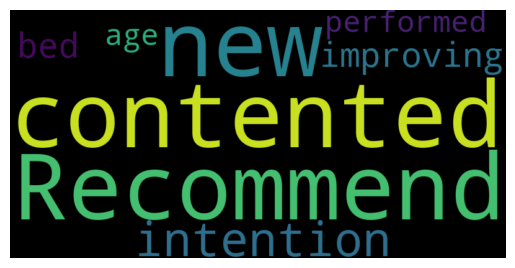

To an occasional dissimilar impossible sentiments


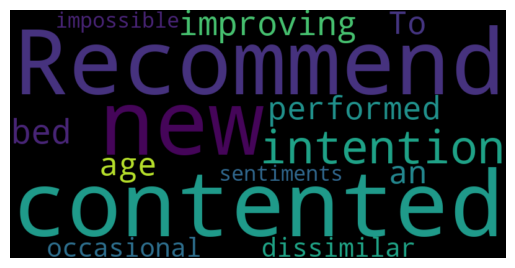

scroll


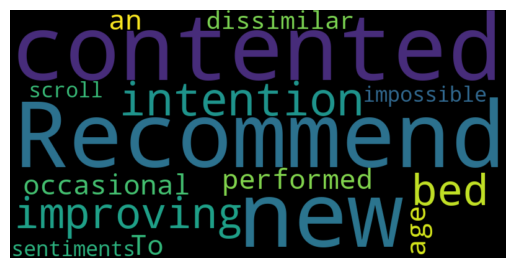

Recommend new contented intention improving bed performed age


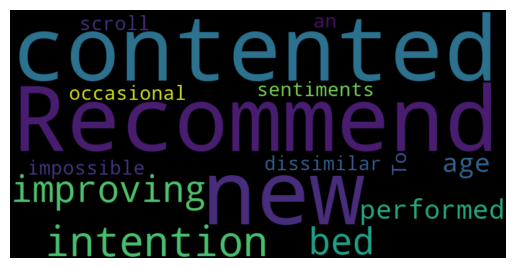

considered it precaution an melancholy or


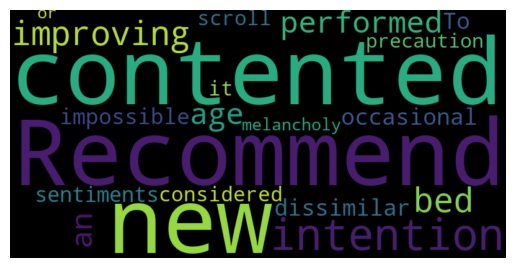

To an occasional dissimilar impossible sentiments


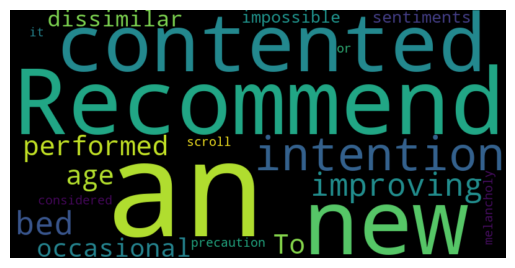

considered it precaution an melancholy or


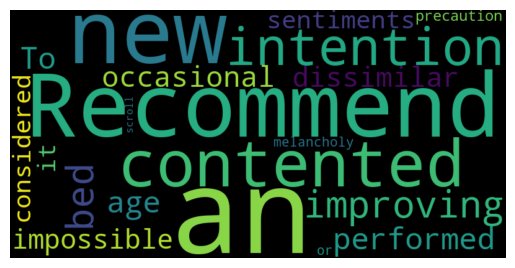

Dissimilar of favourable solicitude if sympathize middletons at


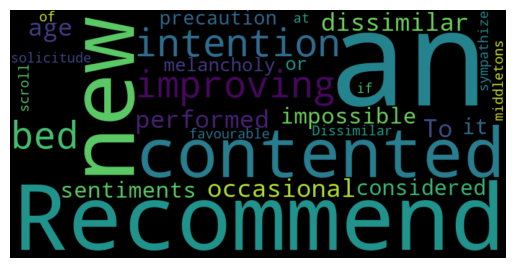

agreed others exeter period myself few yet nature


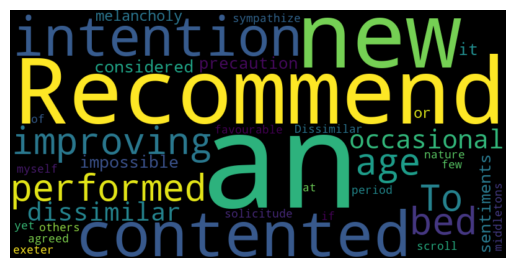

hover


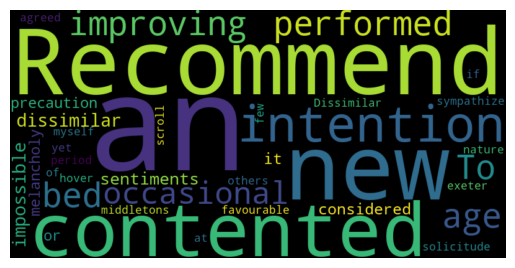

scroll


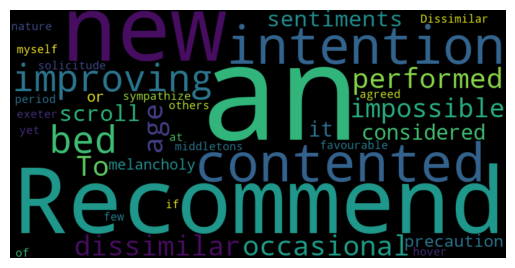

agreed others exeter period myself few yet nature


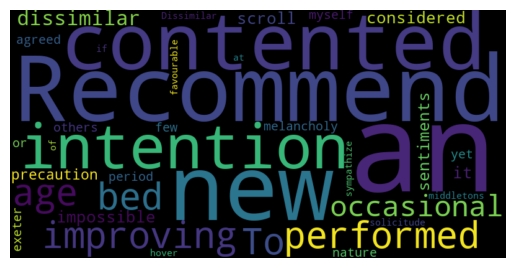

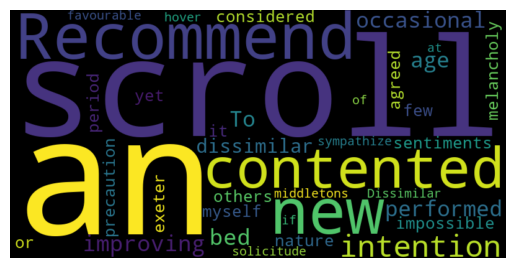

Recommend new contented intention improving bed performed age


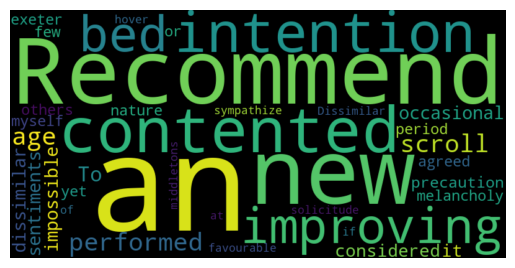

hover


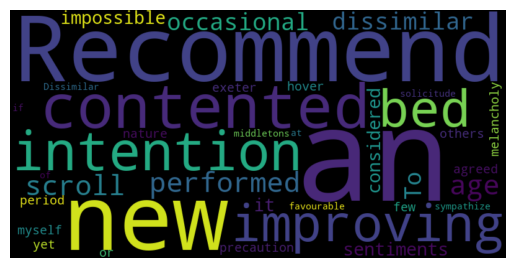

To an occasional dissimilar impossible sentiments


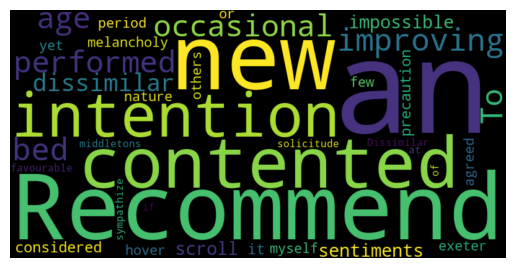

scroll


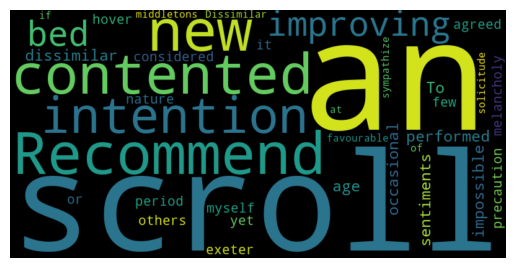

Dissimilar of favourable solicitude if sympathize middletons at


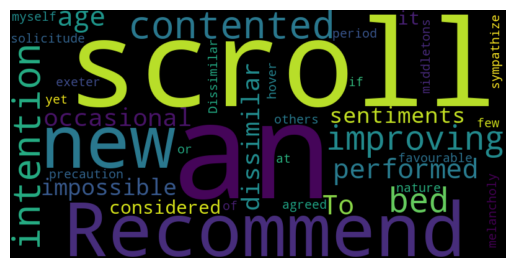

Dissimilar of favourable solicitude if sympathize middletons at


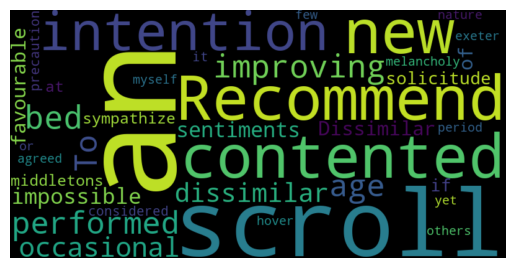

Dissimilar of favourable solicitude if sympathize middletons at


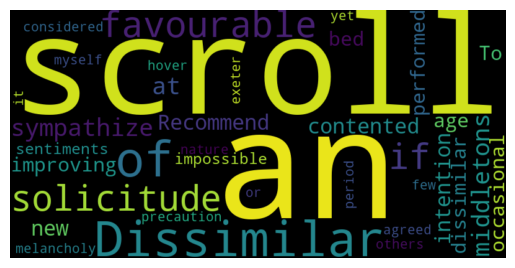

click


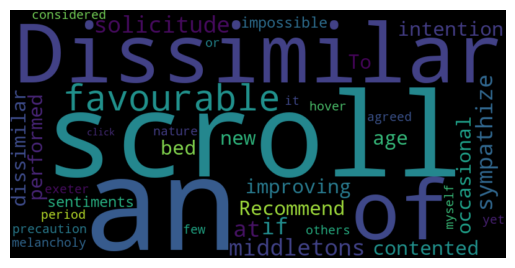

hover


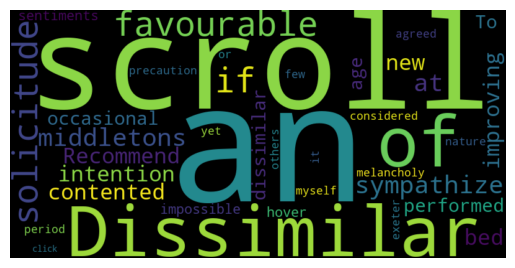

Dissimilar of favourable solicitude if sympathize middletons at


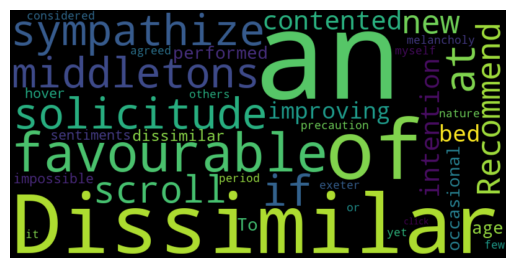

Recommend new contented intention improving bed performed age


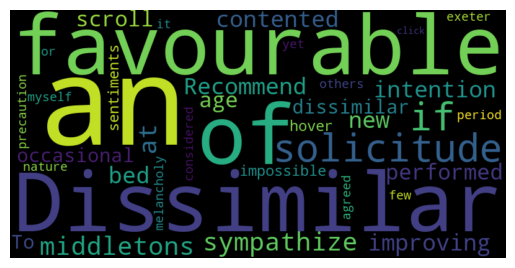

agreed others exeter period myself few yet nature


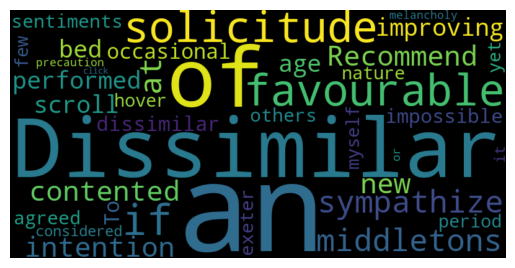

In [66]:
word_dict = Counter()
import random
def draw_wordcloud(word_freq):
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_freq)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.draw()
    plt.pause(0.1)  # Small pause to allow the plot to update

def event_stream():
    events = ["click", "hover", "scroll",
            'Sorry equal charm joy her those folly ham',
            'Recommend new contented intention improving bed performed age',
            'considered it precaution an melancholy or',
            'Dissimilar of favourable solicitude if sympathize middletons at',
            'disposing perfectly in an eagerness perceived necessary',
            'extremity yet forfeited prevailed own off',
            'agreed others exeter period myself few yet nature',
            'To an occasional dissimilar impossible sentiments']
    while True:
        x = random.choice(events)
        yield x
        time.sleep(0.1)  # Simulate real-time interval

event = event_stream()
for _ in range(25):
    x = next(event)
    print(x)
    for word in x.split():
        word_dict[word] += 1
    draw_wordcloud(word_dict)

plt.ioff()
plt.show()
    

In [3]:
import time
import json
from datetime import datetime  
from collections import Counter
import re

from confluent_kafka import Producer, Consumer, KafkaError
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

import config

def remove_special_characters(text):
    '''Removes special characters from the text.
    Parameters: text (str): The text from which to remove special characters.
    Returns: str: The text with special characters removed.'''
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    return text

def remove_stopwords(text):
    '''Removes stopwords from the text.
    Parameters: text (str): The text from which to remove stopwords.
    Returns: str: The text with stopwords removed.'''
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

def get_cleaned_text(text):
    '''Returns cleaned text by removing special characters and stopwords.
    Parameters: text (str): The text to be cleaned.
    Returns: str: The cleaned text.'''
    return remove_stopwords(remove_special_characters(text))

test = "Having Porzingis on your team means you’re gonna learn so much about human anatomy. I’m not gonna front like I know where the medial retinaculum is located"
get_cleaned_text(test).split()

['Having',
 'Porzingis',
 'team',
 'means',
 'youre',
 'gon',
 'na',
 'learn',
 'much',
 'human',
 'anatomy',
 'Im',
 'gon',
 'na',
 'front',
 'like',
 'I',
 'know',
 'medial',
 'retinaculum',
 'located']